In [1]:
import pandas as pd

# Загрузка даних
data = pd.read_csv('avocado.csv', delimiter=',', encoding='latin1')

# Видалення нульових значень
data = data.dropna()

# Вивід даних
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [2]:
from sklearn.preprocessing import StandardScaler

# Вибір двох стовпців по 1000 рядків для класетризації
data_for_clusterization = data[['Small Bags', 'Large Bags']][:1000]

# Нормалізація даних
scaler = StandardScaler()
data_for_clusterization = scaler.fit_transform(data_for_clusterization)

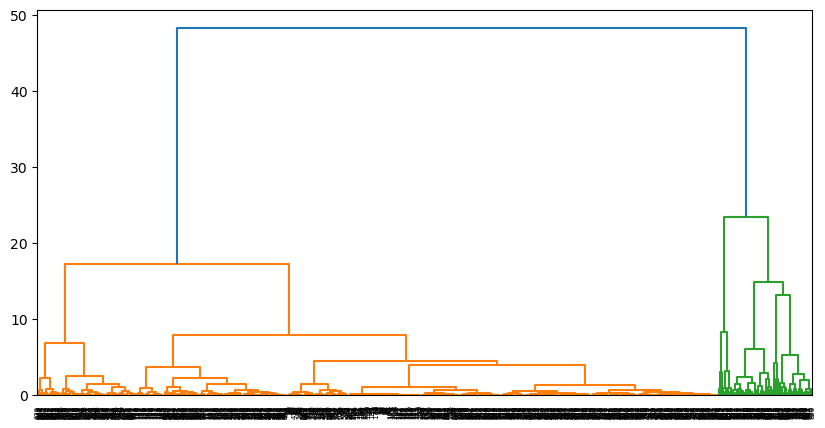

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Створення ієрархічної кластеризації та візуалізація

# Побудова матриці відстаней та ієрархічна кластеризація
ierarchy = linkage(data_for_clusterization, method='ward')

# Побудова дендрограми
plt.figure(figsize=(10, 5))
dendrogram(ierarch)
plt.show()

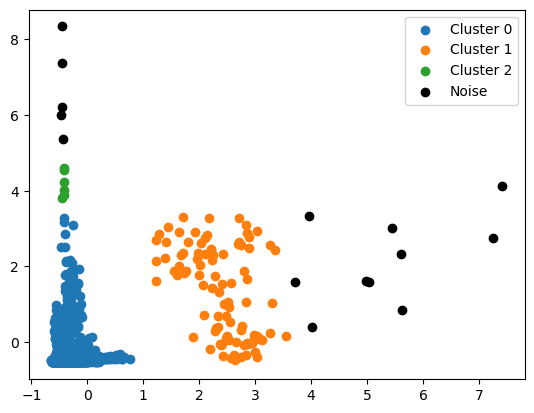

In [6]:
from sklearn.cluster import DBSCAN

# Створення кластеризації на основі щільності та візуалізація

# Створення моделі DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
# eps - радіус щільності, min_samples - мінімальна кількість точок в околі для визначення кластера

# Виконання кластеризації
dbscan.fit(data_for_clusterization)

# Візуалізація результатів
labels = dbscan.labels_
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:
        plt.scatter(data_for_clusterization[labels == label][:, 0], data_for_clusterization[labels == label][:, 1], label='Noise', color='black')
    else:
        plt.scatter(data_for_clusterization[labels == label][:, 0], data_for_clusterization[labels == label][:, 1], label=f'Cluster {label}')

plt.legend()
plt.show()

In [17]:
# Визначення оптимальної кількості кластерів для ієрархічної кластеризації

def find_optimal_number_of_clusters(data_for_clusterization, method='ward'):
    ierarchy = linkage(data_for_clusterization, method=method)
    
    # Визначення кількості кластерів з дендрограми
    last_merge_distance = ierarchy[-1, 2]
    distances = ierarchy[:, 2]
    num_clusters = len(distances) + 1
    optimal_num_clusters = 1
    
    for i in range(2, num_clusters + 1):
        if (last_merge_distance - distances[-i]) / (last_merge_distance - distances[-1]) > 0.7:
            optimal_num_clusters = i
            break

    return optimal_num_clusters

# Виклик функції для визначення оптимальної кількості кластерів
optimal_clusters = find_optimal_number_of_clusters(data_for_clusterization, method='ward')
print(f'Оптимальна кількість кластерів: {optimal_clusters}')

Оптимальна кількість кластерів: 2


C:\Users\boguc\AppData\Local\Temp\ipykernel_1056\3178239410.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  if (last_merge_distance - distances[-i]) / (last_merge_distance - distances[-1]) > 0.7:


In [20]:
from sklearn.metrics import silhouette_score
import numpy as np

# Визначення оптимальної кількості кластерів для кластеризації на основі щільності

def find_optimal_number_of_clusters_dbscan(data_for_clusterization):
    eps_values = np.arange(0.1, 1.0, 0.1)
    min_samples_values = [5, 10, 15]

    best_score = -1
    best_eps = None
    best_min_samples = None
    best_labels = None

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data_for_clusterization)
            score = silhouette_score(data_for_clusterization, labels)
            
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels

    return best_eps, best_min_samples, best_labels

# Виклик функції для підбору оптимальних параметрів та кількості кластерів
best_eps, best_min_samples, best_labels = find_optimal_number_of_clusters_dbscan(data_for_clusterization)
print(f'Найкращі параметри DBSCAN: eps = {best_eps}, min_samples = {best_min_samples}')
print(f'Кількість кластерів: {len(np.unique(best_labels))}')

Найкращі параметри DBSCAN: eps = 0.30000000000000004, min_samples = 15
Кількість кластерів: 2


In [29]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# Визначення якості кластеризації з допомогою Silhouette score та CHI

silhouette_ierarchy = silhouette_score(data_for_clusterization, fcluster(ierarchy, 2, criterion='maxclust'))
chi_score_ierarchy = calinski_harabasz_score(data_for_clusterization, fcluster(ierarchy, 2, criterion='maxclust'))

silhouette_dbscan = silhouette_score(data_for_clusterization, dbscan.labels_)
chi_score_dbscan = calinski_harabasz_score(data_for_clusterization, dbscan.labels_)

print('Silhouette score коливаєть від -1 до 1, чим ближче до одиниці - тим краще')
print('CHI score - чим вище тим краще')
print()
print(f'Silhouette score для ierarchy: {silhouette_ierarchy}')
print(f'CHI score для ierarchy: {chi_score_ierarchy}')
print()
print(f'Silhouette score для dbscan: {silhouette_dbscan}')
print(f'CHI score для dbscan: {chi_score_dbscan}')

Silhouette score коливаєть від -1 до 1, чим ближче до одиниці - тим краще
CHI score - чим вище тим краще

Silhouette score для ierarchy: 0.7819299961454792
CHI score для ierarchy: 1384.5322244854974

Silhouette score для dbscan: 0.7613665540974901
CHI score для dbscan: 645.0708581940853


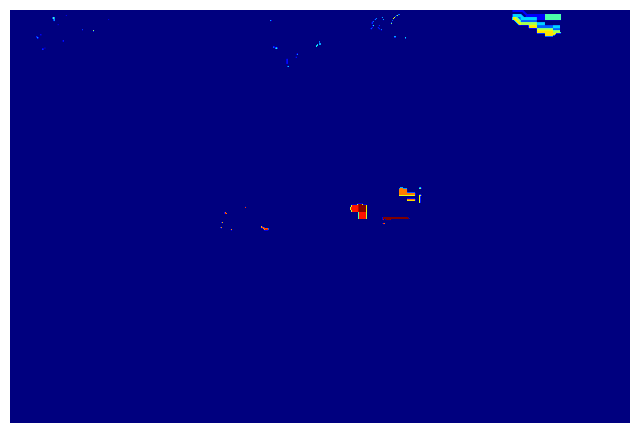

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Завантаження зображення
image = cv2.imread('image_for_clusterization.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Розмір зображення
height, width, channels = image.shape

# Перетворення зображення у 2D-масив
image_2d = image.reshape((height * width, channels))

# Створення об'єкта DBSCAN та кластеризація
dbscan = DBSCAN(eps=0.3, min_samples=100)
dbscan.fit(image_2d)

# Отримання міток кластерів
labels = dbscan.labels_

# Перетворення міток кластерів у форму відповідну розміру зображення
segmented_image = labels.reshape((height, width))

# Візуалізація результату
plt.figure(figsize=(8, 8))
plt.imshow(segmented_image, cmap='jet')
plt.axis('off')
plt.show()